In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
N=10
2*np.pi/N*np.arange(0,N+1)

array([0.        , 0.62831853, 1.25663706, 1.88495559, 2.51327412,
       3.14159265, 3.76991118, 4.39822972, 5.02654825, 5.65486678,
       6.28318531])

In [4]:
def PolynomeReg(N,R): #construit un polynôme régulier à N sommets et retourne la liste de ses N sommets concaténé au premier sommet
    Theta=2*np.pi/N*np.arange(0,N+1)
    return(np.array([[R*np.cos(theta),R*np.sin(theta)] for theta in Theta]))

In [5]:
PolynomeReg(3,1)

array([[ 1.00000000e+00,  0.00000000e+00],
       [-5.00000000e-01,  8.66025404e-01],
       [-5.00000000e-01, -8.66025404e-01],
       [ 1.00000000e+00, -2.44929360e-16]])

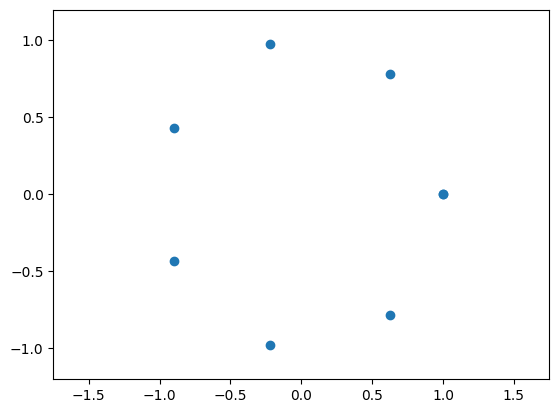

In [6]:
P=PolynomeReg(7,1)
plt.scatter(P[:,0],P[:,1])
plt.xlim([-1.75,1.75])
plt.ylim([-1.2,1.2])
plt.show()

In [7]:
def PolMid(N,R):
    Pol=PolynomeReg(N,R)
    PosAr=[] #milieu des arêtes
    VecAr=[] #vecteurs directeurs des arêtes
    
    for i in range(1,N+1):
        r=0.5*(Pol[i]+Pol[i-1])
        e=0.5*(Pol[i]-Pol[i-1])
        PosAr.append(r)
        VecAr.append(e)
        
    return(Pol,np.array(PosAr),np.array(VecAr))

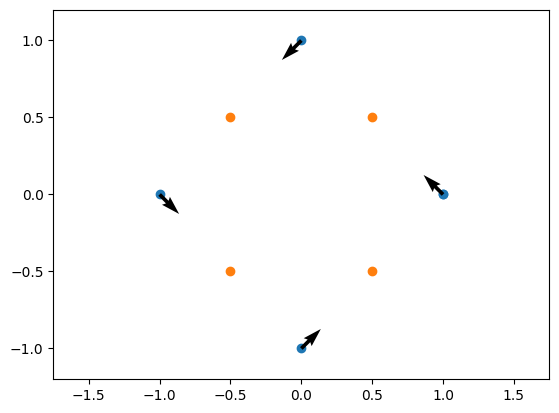

In [8]:
N=4
Pol,Pos,Vec=PolMid(N,1) #on récupère les sommets, les milieux des arêtes et vecteurs directeurs
plt.scatter(Pol[:,0],Pol[:,1])
plt.scatter(Pos[:,0],Pos[:,1])
plt.quiver(Pol[:N,0],Pol[:N,1],Vec[:,0],Vec[:,1]) #à modifier pour avoir la bonne longueur
plt.xlim([-1.75,1.75])
plt.ylim([-1.2,1.2])
plt.show()

In [9]:
def FormFactor(q,N,R):
    Pol,Pos,Vec=PolMid(N,R) #on récupère les sommets, les milieux des arêtes et vecteurs directeurs
    qx,qy=q[0],q[1] #selon les directions x ou y
    c=0 #on suppose ici que c vaut 0 dans la formule de Wuttke
    s=0 #notre somme de termes pour calculer le facteur de forme d'après la formule de Wuttke.
    for i in range(N):
        ex,ey=Vec[i][0],Vec[i][1]
        rx,ry=Pos[i][0],Pos[i][1]
        
        s+=(qx*ey-qy*ex)*(np.sinc((qx*ex+qy*ey)/np.pi)*np.exp(1j*(qx*rx+qy*ry))-c)
        
    return(2*s/(1j*(qx*qx+qy*qy)))

In [10]:
np.exp(2j*np.pi)

(1-2.4492935982947064e-16j)

In [11]:
def I(qx,qy,N,R):
    q=[qx,qy]
    return((np.abs(FormFactor(q,N,R)))**2)

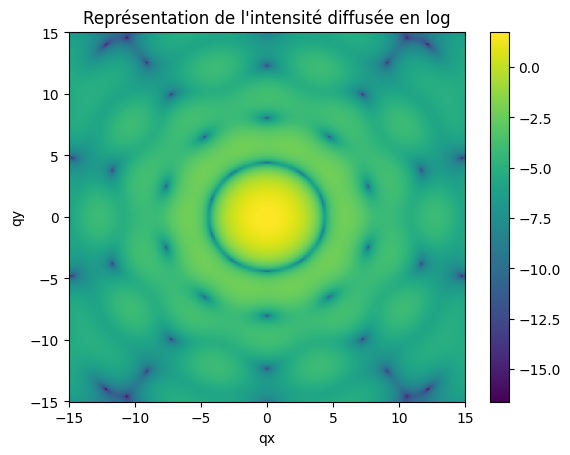

In [12]:
N=5
R=1

dqx=15
dqy=15

Qx=np.linspace(-dqx,dqx,500)
Qy=np.linspace(-dqy,dqy,500)

qqx,qqy=np.meshgrid(Qx,Qy)

plt.pcolormesh(Qx,Qy,np.log(I(qqx,qqy,N,R)),shading='auto')
plt.colorbar()
plt.xlabel('qx')
plt.ylabel('qy')
plt.title("Représentation de l'intensité diffusée en log")
plt.show()


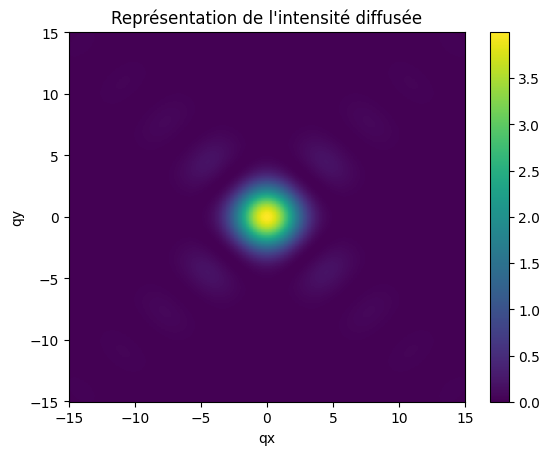

In [19]:
N=4
R=1

dqx=15
dqy=15

Qx=np.linspace(-dqx,dqx,500)
Qy=np.linspace(-dqy,dqy,500)

qqx,qqy=np.meshgrid(Qx,Qy)

plt.pcolormesh(Qx,Qy,I(qqx,qqy,N,R),shading='auto')
plt.colorbar()
plt.xlabel('qx')
plt.ylabel('qy')
plt.title("Représentation de l'intensité diffusée")
plt.show()


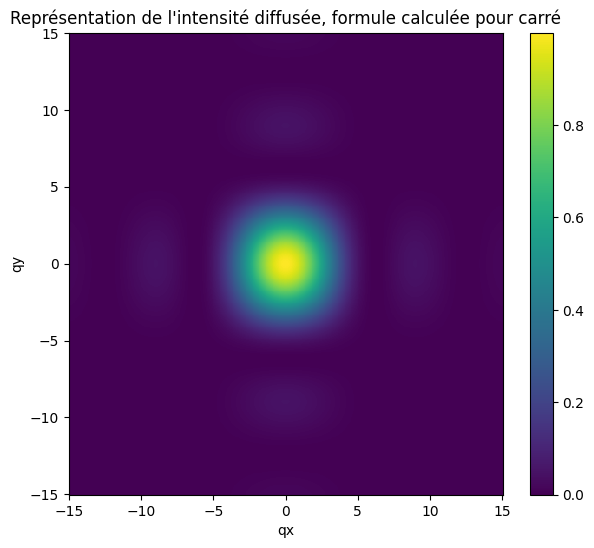

In [15]:
def Icarre(qx,qy,a,b):
    A=4*np.sin(qx*a*0.5)*np.sin(qy*b*0.5)/(qx*qy)
    return(A**2)


# In[29]:
a=1
b=1

dqx=15/a
dqy=15/b

Qx=np.linspace(-dqx,dqx,500)
Qy=np.linspace(-dqy,dqy,500)

qqx,qqy=np.meshgrid(Qx,Qy)
plt.rcParams['figure.figsize'] = [7, 6]  

plt.pcolormesh(Qx,Qy,Icarre(qqx,qqy,a,b),shading='auto')
plt.colorbar()
plt.xlabel('qx')
plt.ylabel('qy')
plt.title("Représentation de l'intensité diffusée, formule calculée pour carré")
plt.show()


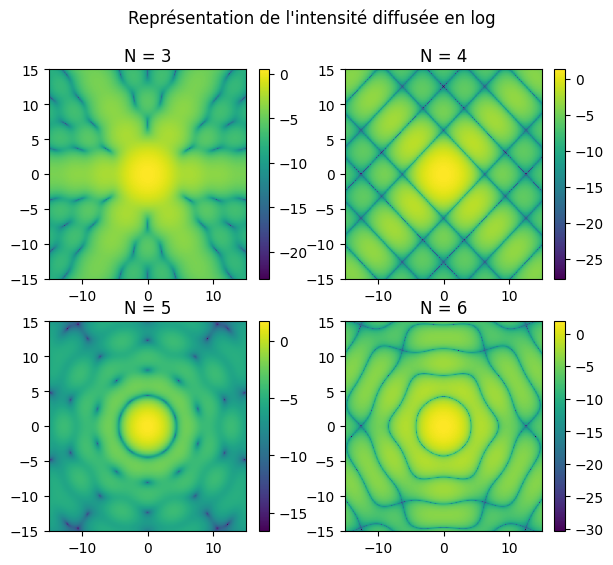

In [20]:
R=1

dqx=15
dqy=15

Qx=np.linspace(-dqx,dqx,500)
Qy=np.linspace(-dqy,dqy,500)

qqx,qqy=np.meshgrid(Qx,Qy)
i=1
plt.rcParams['figure.figsize'] = [7, 6]  

plt.suptitle("Représentation de l'intensité diffusée en log")
for N in range(3,7):

    plt.subplot(2,2,i)
    plt.pcolormesh(Qx,Qy,np.log(I(qqx,qqy,N,R)),shading='auto')
    plt.colorbar()
    plt.title("N = "+str(N))
    i+=1
plt.show()
